In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1212)

In [4]:
class gaussianDist:
    def __init__(self, name, mu, sigma, size):
        self.name = name
        self.mu = mu
        self.sigma = sigma
        self.size = size
        self.points = np.random.normal(self.mu, self.sigma, self.size)

    def density(self, x):
        return (
            1
            / (self.sigma * np.sqrt(2 * np.pi))
            * np.exp(-(x - self.mu) ** 2 / (2 * self.sigma ** 2))
        )

    def plot(self):
        count, bins, _ = plt.hist(self.points, 30, density=True)
        plt.plot(bins, self.density(bins), linewidth=2, color="r", label="f(x)")
        plt.legend(loc="best")
        plt.show()

    def describe(self):
        print("Gaussian Dist Description:")
        print("Name: %s" % self.name)
        print("Size = %d" % self.size)
        print("Mu = %.4f" % self.mu)
        print("Sigma = %.4f" % self.sigma)

In [5]:
def plotDistsTogether(*dists):
    for dist in dists:
        count, bins, _ = plt.hist(dist.points, 30, density=True)
        plt.plot(bins, dist.density(bins), linewidth=2, label="f(x) " + dist.name)
        plt.legend(loc="best")
    plt.show()


def densityDistsTogether(point, *dists):
    totalDensity = 0
    thetas = list(map(lambda x: x.size, dists))
    totalDistsSize = np.sum(thetas)

    for dist in dists:
        dens = dist.density(point)
        totalDensity += dens * dist.size / totalDistsSize
        print("f(%d in %s) = " % (point, dist.name), dens)

    print("Thetas =", thetas)
    print("Thetas Sum = %d" % totalDistsSize)
    print("Total f(%d) = " % (point), totalDensity)

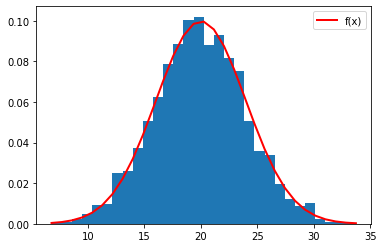

In [6]:
dist1 = gaussianDist("dist1", 20, 4, 3000)
dist1.plot()

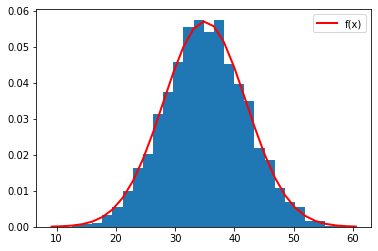

In [7]:
dist2 = gaussianDist("dist2", 35, 7, 5000)
dist2.plot()

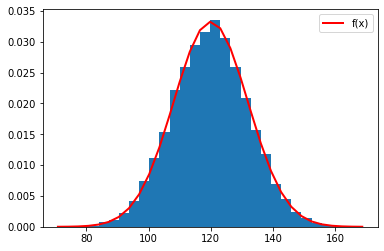

In [8]:
dist3 = gaussianDist("dist3", 120, 12, 10000)
dist3.plot()

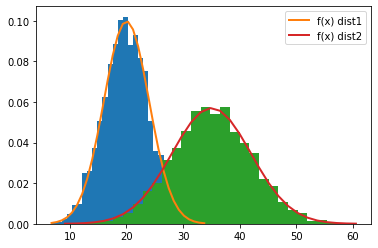

In [9]:
plotDistsTogether(dist1, dist2)

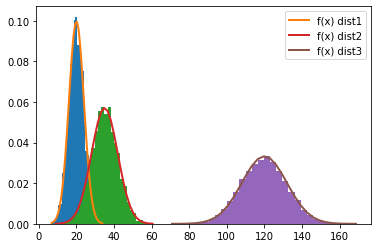

In [10]:
plotDistsTogether(dist1, dist2, dist3)

In [11]:
densityDistsTogether(120, dist1, dist2, dist3)

f(120 in dist1) =  1.9134824341048483e-137
f(120 in dist2) =  5.466041520513093e-34
f(120 in dist3) =  0.03324519003345273
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(120) =  0.01846955001858485


In [12]:
densityDistsTogether(25, dist1, dist2)

f(25 in dist1) =  0.04566227134725548
f(25 in dist2) =  0.020542551821266894
Thetas = [3000, 5000]
Thetas Sum = 8000
Total f(25) =  0.029962446643512615


In [13]:
densityDistsTogether(25, dist1, dist2, dist3)

f(25 in dist1) =  0.04566227134725548
f(25 in dist2) =  0.020542551821266894
f(25 in dist3) =  8.171976075697016e-16
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(25) =  0.013316642952672725


In [14]:
densityDistsTogether(70, dist1, dist2, dist3)

f(70 in dist1) =  1.1737988394937866e-35
f(70 in dist2) =  2.1238850210489971e-07
f(70 in dist3) =  5.646917490734814e-06
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(70) =  3.196173189881813e-06


## Superclass Discovery

In [15]:
class SuperClass:
    def __init__(self):
        self.mu = 0
        self.sigma = 0
        self.alpha = 0
        self.beta = 0
        self.size = 0
        self.subclasses = []
        self.n_subclasses = 0
        self.points = []

    def insert_subclass(self, dist):
        self.points.extend(dist.points)
        self.mu = self.calculate_incremental_mu(dist)
        self.sigma = self.calculate_std_dev(dist)
        self.n_subclasses += 1
        self.subclasses.append(dist.name)
        self.size += dist.size

    def calculate_incremental_mu(self, dist):
        return (self.mu * self.size + dist.mu * dist.size) / (self.size + dist.size)

    def calculate_std_dev(self, dist):
        variance = 0
        for point in self.points:
            variance += (point - self.mu) ** 2
        variance /= self.size + dist.size

        return np.sqrt(variance)

    def describe(self):
        print("Superclass Description:")
        print("Size = %d" % self.size)
        print("Known subclasses:", self.subclasses)
        print("Number of known subclasses = %d" % self.n_subclasses)
        print("Mu = %.4f" % self.mu)
        print("Sigma = %.4f" % self.sigma)
        print("Alpha = %.4f" % self.alpha)
        print("Beta = %.4f" % self.beta)

In [16]:
sc = SuperClass()
sc.insert_subclass(dist1)
sc.describe()

Superclass Description:
Size = 3000
Known subclasses: ['dist1']
Number of known subclasses = 1
Mu = 20.0000
Sigma = 4.0225
Alpha = 0.0000
Beta = 0.0000


In [17]:
sc.insert_subclass(dist3)
sc.describe()

Superclass Description:
Size = 13000
Known subclasses: ['dist1', 'dist3']
Number of known subclasses = 2
Mu = 96.9231
Sigma = 43.4593
Alpha = 0.0000
Beta = 0.0000


# Inverse Gamma Distribution

In [18]:
from scipy.stats import invgamma, invwishart

In [19]:
alpha = 5

inv_gamma_dist = invgamma(alpha, loc=sc.sigma - 1.0 / (alpha - 1))

In [20]:
inv_gamma_dist.mean()

43.459343215276114

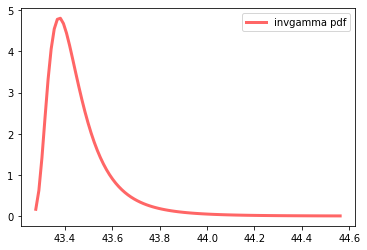

In [21]:
x = np.linspace(inv_gamma_dist.ppf(1e-3), inv_gamma_dist.ppf(1 - 1e-3), 100)

plt.plot(x, inv_gamma_dist.pdf(x), "r-", lw=3, alpha=0.6, label="invgamma pdf")
plt.legend(loc="best")
plt.show()

mean = 9.999999999999991
alpha = 1.1
beta = 1
a = 1.1
loc = 0.0


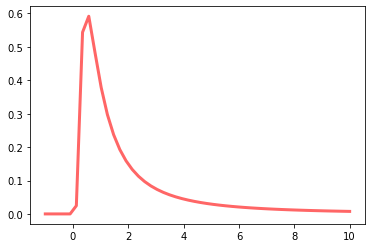

In [22]:
def wiki2scipy(alpha, beta):
    a = alpha
    loc = (beta - 1) / (alpha - 1)
    return a, loc


def updateParams(alpha, beta, samples, new_samples):
    samples += new_samples
    alpha = alpha + len(new_samples) / 2
    print("old beta:", beta)
    beta = beta + (np.sum((np.array(new_samples) - 0.5) ** 2) / 2)
    print("new beta:", beta)
    return alpha, beta, samples


n = 0
alpha = alpha_0 = 1.1
beta = beta_0 = 1
samples = []

np.random.seed(2)
a, loc = wiki2scipy(alpha, beta)
inv_gamma_dist = invgamma(a, loc=loc)
print("mean =", inv_gamma_dist.mean())
print("alpha =", alpha)
print("beta =", beta)
print("a =", a)
print("loc =", loc)
x = np.linspace(-1, 10)
plt.plot(x, inv_gamma_dist.pdf(x), "r-", lw=3, alpha=0.6, label="invgamma pdf")
plt.show()

old beta: 1
new beta: 1.114421295110357
mean = 1.0131102682821427
alpha = 2.1
beta = 1.114421295110357
a = 2.1
loc = 0.10401935919123356


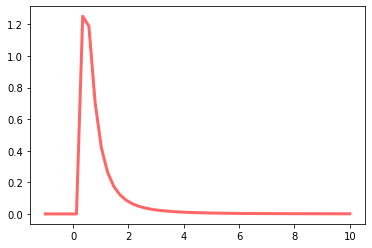

old beta: 1.114421295110357
new beta: 1.1177460724131958
mean = 0.5322600344824742
alpha = 3.1
beta = 1.1177460724131958
a = 3.1
loc = 0.056069558291997994


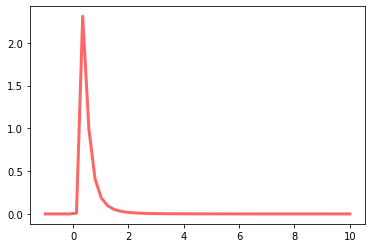

old beta: 1.1177460724131958
new beta: 1.1353098523672782
mean = 0.36622898463460596
alpha = 4.1
beta = 1.1353098523672782
a = 4.1
loc = 0.04364833947331556


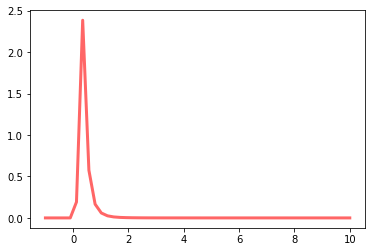

In [23]:
for i in range(3):
    new_samples = np.random.uniform(0, 1, size=2).tolist()
    alpha, beta, samples = updateParams(alpha, beta, samples, new_samples)
    a, loc = wiki2scipy(alpha, beta)
    inv_gamma_dist = invgamma(a, loc=loc)
    print("mean =", inv_gamma_dist.mean())
    print("alpha =", alpha)
    print("beta =", beta)
    print("a =", a)
    print("loc =", loc)
    x = np.linspace(-1, 10)
    plt.plot(x, inv_gamma_dist.pdf(x), "r-", lw=3, alpha=0.6, label="invgamma pdf")
    plt.show()

In [24]:
a = []

for _ in range(10):
    a.append(inv_gamma_dist.rvs(size=10))
    
a = np.array(a)

print("A =", a)

b_cov = np.dot(a, a.T)

print("B =", b_cov)
print(b_cov.shape)

A = [[0.22236498 0.35451051 0.24864921 0.23960094 0.35533036 0.31892174
  0.20177159 0.31343125 0.21662531 0.45220646]
 [0.52209583 0.30681773 0.51285901 0.18297493 0.31055504 0.17719591
  0.28565886 0.18919114 0.19943167 0.34490427]
 [0.22833503 0.19279692 0.22674798 0.26267695 0.29810793 0.22154625
  0.36406224 0.30309608 0.31055183 0.27334193]
 [0.45916747 0.33810308 0.21018169 0.39495787 0.82885677 0.30876827
  0.57571781 0.26035435 0.33305483 0.28548268]
 [0.28831028 0.44517504 0.32124913 0.76389453 0.32439409 0.18391044
  0.26738914 0.51813686 0.27906363 0.1573433 ]
 [0.2341899  0.17797583 1.3720598  0.87673475 0.46495302 0.34701961
  0.43634872 0.21221886 0.246817   0.31711388]
 [0.26460943 0.16815009 1.03274493 0.2897387  0.31012864 0.25528395
  0.23765181 0.27334112 0.49617222 0.41678354]
 [0.27110397 0.14527561 0.46243299 0.24030581 0.33917415 0.15618582
  0.37454032 0.27352641 0.30777414 0.28164936]
 [0.26297358 0.32690722 0.89858509 0.19475497 0.25241997 0.16612489
  0.4178

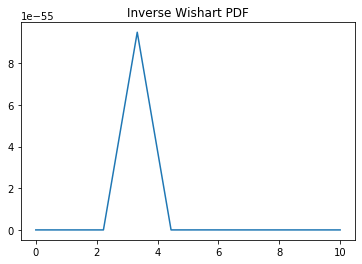

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import invwishart, invgamma
np.random.seed(1212)

iw = invwishart(df=len(b_cov), scale=b_cov)

iw_pdfs = []
for _ in range(10):
    x_iw = np.random.uniform(0, 1, size=(10,10))
    x_iw = np.dot(x_iw, x_iw.T)
    iw_pdfs.append(iw.pdf(x_iw))

x = np.linspace(0, 10, 10)
plt.plot(x, iw_pdfs)
plt.title("Inverse Wishart PDF")
plt.show()